In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def getDf():
    files = {}
    for size in [1000000, 2000000, 3000000, 4000000]:
        with open("../result/resultMergesort_{}.txt".format(size), "r") as f:
            files["size{}".format(size)] = [s.strip().split("#") for s in f.readlines()]

    dfs = {}
    for k in files.keys():
        df = pd.DataFrame(files[k])
        new_header = df.iloc[0]
        df = df[1:]
        df.columns = new_header
        dfs[k] = df
    data = dfs['size1000000']
    for s in [2000000, 3000000, 4000000]:
        data = pd.concat([data, dfs["size{}".format(s)]])
    data = data.astype({"datastructure": str, "size": int, "method": str, "sorttime":int})
    return data

In [4]:
df = getDf()

In [5]:
df_avg = df.groupby(["size", "method"]).mean().reset_index()

In [6]:
df_avg

,size,method,sorttime
0,1000000,"""scope""",1381540.6
1,1000000,"""shared""",1702953.0
2,2000000,"""scope""",2810839.2
3,2000000,"""shared""",3454018.4
4,3000000,"""scope""",4393626.6
5,3000000,"""shared""",5285960.4
6,4000000,"""scope""",5782276.8
7,4000000,"""shared""",7123861.4


In [7]:
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, round(height, 3)),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 12)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


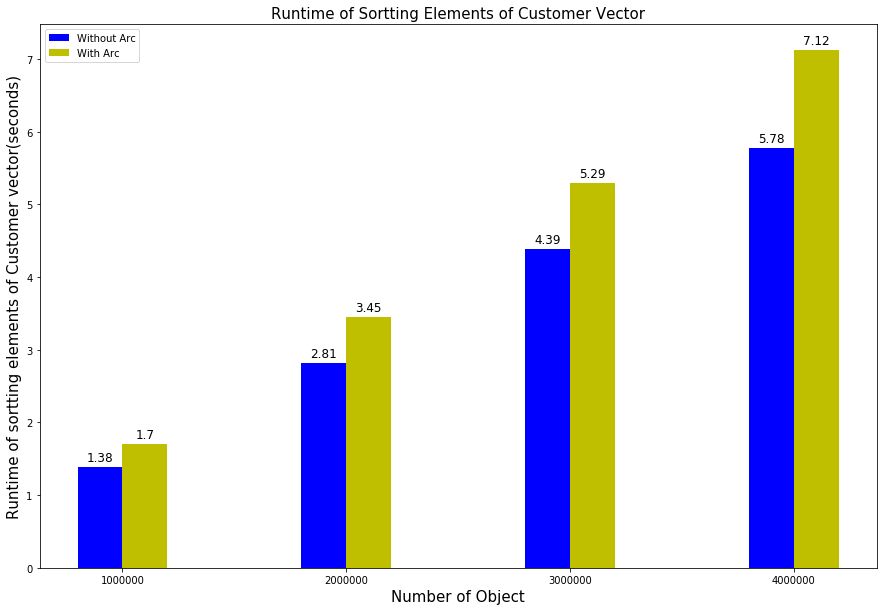

In [8]:
scope = df_avg[df_avg["method"] == '"scope"']
shared = df_avg[df_avg["method"] == '"shared"']
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(df_avg['size'].nunique())
b1 = ax.bar(idx - w / 2, round(scope["sorttime"] / 1000000, 2), width = w, color ='b', align = 'center')
b2 = ax.bar(idx + w / 2, round(shared["sorttime"] / 1000000, 2), width = w, color ='y', align = 'center')
label = np.sort(df_avg['size'].unique())
ax.set_xticks(idx)
ax.set_xticklabels(label)
ax.set_xlabel("Number of Object", fontsize = 15)
ax.set_ylabel("Runtime of sortting elements of Customer vector(seconds)", fontsize = 15)
ax.set_title("Runtime of Sortting Elements of Customer Vector", fontsize = 15)
autolabel(b1, ax)
autolabel(b2, ax)
ax.legend((b1, b2), ("Without Arc", "With Arc"))
##ax.set_yscale('log')
fig.savefig("rust_merge_sort.eps")
plt.show()